In [1]:
%load_ext autoreload
%autoreload 2

In [20]:
import json
from tqdm import tqdm

from nearest_key_lookup import NearestKeyLookup
from nearest_key_lookup_optimized import NearestKeyLookup as NearestKeyLookupOptimized
from ns_tokenizers import ALL_CYRILLIC_LETTERS_ALPHABET_ORD

In [14]:
allowed_keys = ALL_CYRILLIC_LETTERS_ALPHABET_ORD

with open('../data/data_separated_grid/gridname_to_grid.json', encoding='utf-8') as f:
    gridname_to_grid = json.load(f)
grid = gridname_to_grid['default']


nkl = NearestKeyLookup(grid = grid, nearest_key_candidates = allowed_keys)
nkl_optimized = NearestKeyLookupOptimized(keys_list = grid['keys'], allowed_keys = allowed_keys)

In [71]:
failed_input_to_values = {}

for x in tqdm(range(grid['width'])):
    for y in range(grid['height']):
        nkl_result = nkl.get_nearest_kb_label(x, y)
        nkl_optimized_result = nkl_optimized.get_nearest_kb_label(x, y)
        if nkl_result != nkl_optimized_result:
            failed_input_to_values[(x, y)] = (nkl_result, nkl_optimized_result)
        

100%|██████████| 1080/1080 [00:02<00:00, 396.35it/s]


In [72]:
len(failed_input_to_values)

40263

In [83]:
failed_input_to_values

{(0, 323): ('ф', 'я'),
 (0, 324): ('ф', 'я'),
 (0, 325): ('ф', 'я'),
 (0, 326): ('ф', 'я'),
 (0, 327): ('ф', 'я'),
 (0, 328): ('ф', 'я'),
 (0, 329): ('ф', 'я'),
 (0, 330): ('ф', 'я'),
 (0, 331): ('ф', 'я'),
 (0, 332): ('ф', 'я'),
 (0, 333): ('ф', 'я'),
 (0, 334): ('ф', 'я'),
 (0, 335): ('ф', 'я'),
 (0, 336): ('ф', 'я'),
 (0, 337): ('ф', 'я'),
 (0, 338): ('ф', 'я'),
 (0, 339): ('ф', 'я'),
 (0, 340): ('ф', 'я'),
 (0, 341): ('ф', 'я'),
 (0, 342): ('ф', 'я'),
 (0, 343): ('ф', 'я'),
 (0, 344): ('ф', 'я'),
 (0, 345): ('ф', 'я'),
 (0, 346): ('ф', 'я'),
 (0, 347): ('ф', 'я'),
 (0, 348): ('ф', 'я'),
 (0, 349): ('ф', 'я'),
 (0, 350): ('ф', 'я'),
 (0, 351): ('ф', 'я'),
 (0, 352): ('ф', 'я'),
 (0, 353): ('ф', 'я'),
 (0, 354): ('ф', 'я'),
 (0, 355): ('ф', 'я'),
 (0, 356): ('ф', 'я'),
 (0, 357): ('ф', 'я'),
 (0, 358): ('ф', 'я'),
 (0, 359): ('ф', 'я'),
 (0, 360): ('ф', 'я'),
 (0, 361): ('ф', 'я'),
 (0, 362): ('ф', 'я'),
 (0, 363): ('ф', 'я'),
 (0, 364): ('ф', 'я'),
 (0, 365): ('ф', 'я'),
 (0, 366): 

In [64]:
len(failed_input_to_values) / grid['width'] / grid['height'] * 100

5.589288688988839

In [75]:
nkl_optimized = NearestKeyLookupOptimized(keys_list = grid['keys'], allowed_keys = allowed_keys)
nkl_optimized.get_nearest_kb_label(0, 323)

'я'

In [29]:
grid

{'width': 1080,
 'height': 667,
 'keys': [{'label': 'й', 'hitbox': {'x': 0, 'y': 15, 'w': 99, 'h': 154}},
  {'label': 'ц', 'hitbox': {'x': 98, 'y': 15, 'w': 99, 'h': 154}},
  {'label': 'у', 'hitbox': {'x': 196, 'y': 15, 'w': 100, 'h': 154}},
  {'label': 'к', 'hitbox': {'x': 295, 'y': 15, 'w': 99, 'h': 154}},
  {'label': 'е', 'hitbox': {'x': 393, 'y': 15, 'w': 99, 'h': 154}},
  {'label': 'н', 'hitbox': {'x': 491, 'y': 15, 'w': 99, 'h': 154}},
  {'label': 'г', 'hitbox': {'x': 589, 'y': 15, 'w': 99, 'h': 154}},
  {'label': 'ш', 'hitbox': {'x': 687, 'y': 15, 'w': 99, 'h': 154}},
  {'label': 'щ', 'hitbox': {'x': 785, 'y': 15, 'w': 100, 'h': 154}},
  {'label': 'з', 'hitbox': {'x': 884, 'y': 15, 'w': 99, 'h': 154}},
  {'label': 'х', 'hitbox': {'x': 982, 'y': 15, 'w': 98, 'h': 154}},
  {'label': 'ф', 'hitbox': {'x': 0, 'y': 169, 'w': 99, 'h': 154}},
  {'label': 'ы', 'hitbox': {'x': 98, 'y': 169, 'w': 99, 'h': 154}},
  {'label': 'в', 'hitbox': {'x': 196, 'y': 169, 'w': 100, 'h': 154}},
  {'labe

In [40]:
nkl_optimized.keyboard_y_offset, nkl_optimized.key_height

(15, 154)

In [44]:
(100 - 15) // 154

0

In [47]:
nkl_optimized.rows

[['й', 'ц', 'у', 'к', 'е', 'н', 'г', 'ш', 'щ', 'з', 'х'],
 ['ф', 'ы', 'в', 'а', 'п', 'р', 'о', 'л', 'д', 'ж', 'э'],
 ['я', 'ч', 'с', 'м', 'и', 'т', 'ь', 'б', 'ю']]

In [48]:
nkl_optimized.keyboard_y_offset

15

In [53]:
row_idx_unclipped = (100 - nkl_optimized.keyboard_y_offset) // nkl_optimized.key_height
row_idx_unclipped

0

In [54]:
import numpy as np
int(np.clip(row_idx_unclipped, a_min = 0, a_max = len(nkl_optimized.rows) - 1))

0

In [55]:
nkl_optimized.rows[0]

['й', 'ц', 'у', 'к', 'е', 'н', 'г', 'ш', 'щ', 'з', 'х']

In [76]:
nkl_optimized.x_offsets

[0, 0, 119]

In [77]:
optimized_results = np.array([nkl_optimized.get_nearest_kb_label(x, y) for x in range(grid['width']) for y in range(grid['height'])]).reshape(grid['width'], grid['height'])

In [78]:
optimized_results

array([['й', 'й', 'й', ..., 'я', 'я', 'я'],
       ['й', 'й', 'й', ..., 'я', 'я', 'я'],
       ['й', 'й', 'й', ..., 'я', 'я', 'я'],
       ...,
       ['х', 'х', 'х', ..., 'ю', 'ю', 'ю'],
       ['х', 'х', 'х', ..., 'ю', 'ю', 'ю'],
       ['х', 'х', 'х', ..., 'ю', 'ю', 'ю']], dtype='<U1')

In [79]:
non_optimized_results = np.array([nkl.get_nearest_kb_label(x, y) for x in range(grid['width']) for y in range(grid['height'])]).reshape(grid['width'], grid['height'])

In [86]:
non_optimized_results = non_optimized_results.T

In [87]:
optimized_results = optimized_results.T

In [ ]:
optimized_results[323:]

array([['ф', 'ф', 'ф', ..., 'э', 'э', 'э'],
       ['я', 'я', 'я', ..., 'ю', 'ю', 'ю'],
       ['я', 'я', 'я', ..., 'ю', 'ю', 'ю'],
       ...,
       ['я', 'я', 'я', ..., 'ю', 'ю', 'ю'],
       ['я', 'я', 'я', ..., 'ю', 'ю', 'ю'],
       ['я', 'я', 'я', ..., 'ю', 'ю', 'ю']], dtype='<U1')

In [94]:
non_optimized_results[323:]

array([['ф', 'ф', 'ф', ..., 'э', 'э', 'э'],
       ['ф', 'ф', 'ф', ..., 'э', 'э', 'э'],
       ['ф', 'ф', 'ф', ..., 'э', 'э', 'э'],
       ...,
       ['я', 'я', 'я', ..., 'ю', 'ю', 'ю'],
       ['я', 'я', 'я', ..., 'ю', 'ю', 'ю'],
       ['я', 'я', 'я', ..., 'ю', 'ю', 'ю']], dtype='<U1')

In [81]:
import matplotlib.pyplot as plt

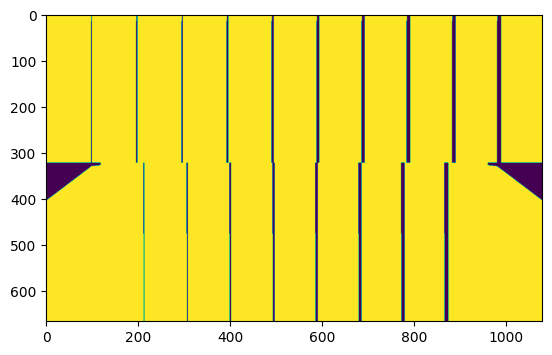

In [101]:
plt.imshow(optimized_results == non_optimized_results)

In [102]:
from ns_tokenizers import KeyboardTokenizerv1

In [103]:
keyboard_tokenizer = KeyboardTokenizerv1()

In [106]:
dir(keyboard_tokenizer)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'get_token',
 'i2t',
 't2i']

In [111]:
# apply keyboard_tokenizer.get_token(token_id) to optimized_results array

optimized_results_int = np.vectorize(keyboard_tokenizer.get_token)(optimized_results)
non_optimized_results_int = np.vectorize(keyboard_tokenizer.get_token)(non_optimized_results)

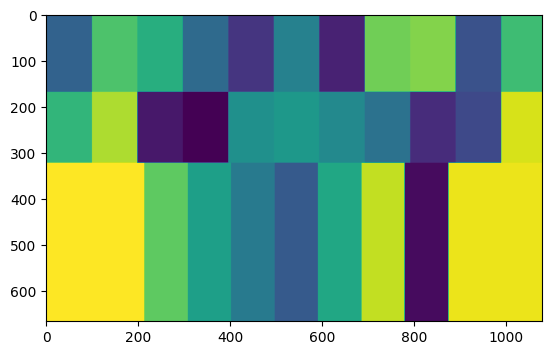

In [110]:
plt.imshow(optimized_results_int)

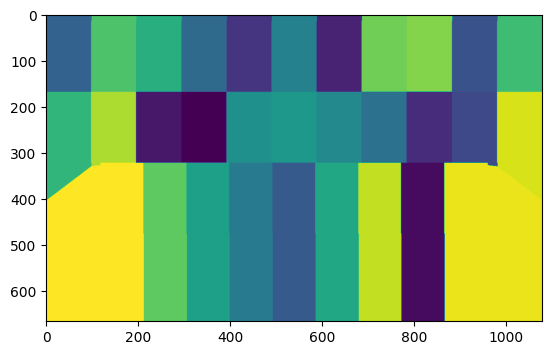

In [112]:
plt.imshow(non_optimized_results_int)

In [113]:
# for i in rage (-3000, 3000), for j in range (-1500, 1500)
huge_results_non_optimized = np.array(
    [nkl.get_nearest_kb_label(x, y) for x in range(-3000, 3000) for y in range(-1500, 1500)]
).reshape(6000, 3000)

In [114]:
huge_results_non_optimized_int = np.vectorize(keyboard_tokenizer.get_token)(huge_results_non_optimized).T

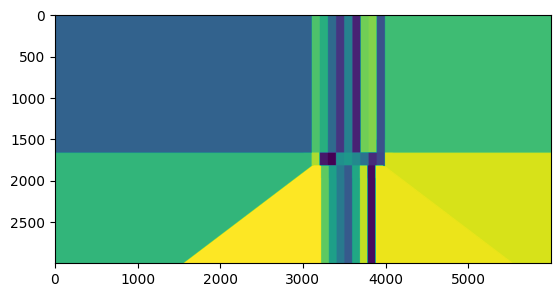

In [116]:
plt.imshow(huge_results_non_optimized_int)